# 데이터셋 API
- 데이터 입력 파이프라인을 위한 패키지
- tf.data 패키지에서 제공
- tf.data.Dataset 추상클래스에서 상속된 여러가지 클래스 객체를 사용 또는 만들어 쓴다.

## 데이터 입력 파이프라인이란
**모델에 공급**되는 데이터에 대한 전처리 작업과 공급을 담당한다.    
- 이미지 데이터의 경우
    - 분산 파일시스템으로 부터 이미지를 모으는 작업, 
    - 이미지에 노이즈를 주거나 변형하는 작업, 
    - 배치 학습을 위해 무작위로 데이터를 선택하여 배치데이터를 만드는 작업
- 텍스트 데이터 경우
    - 원문을 토큰화하는 작업
    - 임베딩하는 작업
    - 길이가 다른 데이터를 패딩하여 합치는 작업 


## 데이터셋 API 사용 세단계
1. 데이터셋 생성
    - from_tensor_slices(), from_generator() 클래스 메소드, tf.data.TFRecordDataset 클래스를 사용해 메모리나 파일에 있는 데이터를 데이터소스로 만든다.
    - from_tensor_slices(): 리스트 넘파이배열, 텐서플로 자료형에서 데이터를 생성한다.
2. 데이터셋 변형: map(), filter(), batch() 등 메소드를 이용해 데이터 소스를 변형한다.
3. for 반복문에서 iterate를 통해 데이터셋 사용

## Dataset의 주요 메소드
- map(함수) : dataset의 각 원소들을 함수로 처리한다.
- shuffle(크기): dataset의 원소들의 순서를 섞는다. 크기는 섞는 공간의 크기로  **데이터보다 크거나 같으면** 완전셔플, **적으면 일부만 가져와서 섞어** 완전셔플이 안된다.=>데이터가 너무너무 많으면 적게 주기도 한다.)
- batch(size) : 반복시 제공할 데이터 수. 지정한 batch size만큼 data를 꺼내준다.

## 필기 
- map, filter 메소드를 보면 자료구조와 관련해서 map, 필터는 사용법이 같다. 
- 맵은 데이터 하나하나를 변형, 필터는 조건을 줘서 조건에 만족하는 것들 걸러내는 것 
- 배치()는 배치사이즈도 설정해준다. 
- 실제 반복문을 돌리지 않는다. 지금 우리는 돌아가는 것을 확인하기 위해서 반복문 돌리는거 

# ?
- 분산파일 시스템으로 부터 이미지를 왜 모아?
- 배치학습과 무작위 관계? 
- 전처리 작업하기 위해서 데이터입력 파이프라인인 데이터셋 클래스? API를 사용하는게 맞지? 그리고 그 아래 작업들이 대부분 처리하는 전처리 하는 내용들인거고? 

In [2]:
import tensorflow as tf 
import numpy as np 

arr = np.arange(9) # 0~8까지 배열 생성 , 데이터 , 메모리에 넘파일 배열로 저장이 되어 있다. 

# 메모리에 배열로 저장된 데이터를 이용해 데이터셋 객체를 생성해보자 
dataset = tf.data.Dataset.from_tensor_slices(arr) # (1) 메모리에서 데이터셋으로 값 읽어오기 
# 텐서플로우 API에서 -> data 모듈의 Dataset 클래스(?) from_tensor_slices() 메서드를 사용 
# API, 모듈, 클래스, 메서드 이 개념이 약간 헷갈리네 
type(dataset) # tensorflow.python.data.ops.dataset_ops.TensorSliceDataset 

# 각각의 원소를 변환하는 작업을 데이터을 추가해보자. 
# 이때 Dataset.map(변환함수)를 사용한다. 변환하는 함수에 저장해라

dataset = dataset.map(lambda x:x**2) # 복잡하면 함수를 만들어서 넘기거나 짧으면 람다 사용해도 좋음 (2)맵을 이용해서 새로운 데이터셋 
type(dataset) # tensorflow.python.data.ops.dataset_ops.MapDataset --> map 이 적용된 데이터 셋이야 

# 필터를 사용해보자 - 2의 배수만 출력해라 
# dataset = dataset.filter(lambda x : x%2 == 0)

# 데이터셋에서 제공되는 값들을 조회해보자 -> 이때 반복문을 사용할거다 
for a in dataset: # (3) 반복문 돌려서 결과를 제공해줘라 
    print(a) 
    
# 텐서 타입으로 뽑혀져 나온다. tf.Tensor는 텐서플로우 버전의 배열이다. 
# 0 ~ 8 까지 넣은 거니 --> 2^0, 2^1, 2^2 제곱한 값이 나와있음을 알수 있다. 
# 0~ 8 까지의 로우데이터에서 데이터셋으로 값을 읽어오고 --> 맵을 이용해서 새로운 데이터셋을 만들어보고 --> 필요에 의해 필터링하고 --> 데이터셋을 제공해라 

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)
tf.Tensor(16, shape=(), dtype=int64)
tf.Tensor(25, shape=(), dtype=int64)
tf.Tensor(36, shape=(), dtype=int64)
tf.Tensor(49, shape=(), dtype=int64)
tf.Tensor(64, shape=(), dtype=int64)


In [3]:
# 데이터를 섞어보자 
dataset = dataset.shuffle(3) # 안에 숫자의 의미 : 메모리의 크기 , 3이면 데이터 3개만 섞을거야. 

for a in dataset: 
    print(a) 
    
# Q : 왜 값이 이렇게 되지???? 3개만 섞는다??? 

tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(16, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)
tf.Tensor(36, shape=(), dtype=int64)
tf.Tensor(49, shape=(), dtype=int64)
tf.Tensor(64, shape=(), dtype=int64)
tf.Tensor(25, shape=(), dtype=int64)


In [4]:
# 배치로 한번에 지정한 개수 만큼 제공한다. 
dataset = dataset.batch(4) # 숫자 : 제공 갯수 

for a in dataset: 
    print(a) # 4개씩 묶어서 총 9개 출력됨 
    
# Q. 배치는 어떨때 주로 사용하나??? 

tf.Tensor([ 0  9  1 25], shape=(4,), dtype=int64)
tf.Tensor([36 49 64  4], shape=(4,), dtype=int64)
tf.Tensor([16], shape=(1,), dtype=int64)


- (1) 메모리에서 읽어오기
- (2) 맵으로 데이터 변경 
- (3.1) 필터로 걸러내기 
- (3.2) 셔플로 섞어내기 
- (3.3) 배치로 한번에 지정 갯수만큼 제공 

In [5]:
# 또다른 예시 
x = np.arange(10)
y = np.arange(10, 20)

x.shape, y.shape # ((10,), (10,)) 

ds = tf.data.Dataset.from_tensor_slices((x,y)) # 튜플로 묶여서 , 이때 x, y 원소의 갯수가 같아야 한다. 


In [32]:
for a in ds:
    print(a) 
#     break
    
# 튜플로 나옴 
# (<tf.Tensor: id=288, shape=(), dtype=int64, numpy=0>, <tf.Tensor: id=289, shape=(), dtype=int64, numpy=10>)

(<tf.Tensor: id=331, shape=(), dtype=int64, numpy=0>, <tf.Tensor: id=332, shape=(), dtype=int64, numpy=10>)
(<tf.Tensor: id=333, shape=(), dtype=int64, numpy=1>, <tf.Tensor: id=334, shape=(), dtype=int64, numpy=11>)
(<tf.Tensor: id=335, shape=(), dtype=int64, numpy=2>, <tf.Tensor: id=336, shape=(), dtype=int64, numpy=12>)
(<tf.Tensor: id=337, shape=(), dtype=int64, numpy=3>, <tf.Tensor: id=338, shape=(), dtype=int64, numpy=13>)
(<tf.Tensor: id=339, shape=(), dtype=int64, numpy=4>, <tf.Tensor: id=340, shape=(), dtype=int64, numpy=14>)
(<tf.Tensor: id=341, shape=(), dtype=int64, numpy=5>, <tf.Tensor: id=342, shape=(), dtype=int64, numpy=15>)
(<tf.Tensor: id=343, shape=(), dtype=int64, numpy=6>, <tf.Tensor: id=344, shape=(), dtype=int64, numpy=16>)
(<tf.Tensor: id=345, shape=(), dtype=int64, numpy=7>, <tf.Tensor: id=346, shape=(), dtype=int64, numpy=17>)
(<tf.Tensor: id=347, shape=(), dtype=int64, numpy=8>, <tf.Tensor: id=348, shape=(), dtype=int64, numpy=18>)
(<tf.Tensor: id=349, shape=(

In [42]:
# 값 변경 -- x는2제곱, y는3제곱 을 해보자
ds2 = ds.map(lambda x, y : (x**2, y**3))

# def map_func(x, y): # 데이터셋에 2개의 배열을 넣었을 경우 변수 2개로 각각 받는다. 
#     return x**2, y**3
for a in ds2:
        print(a)
#         break # 하나만 출력해보자 

(<tf.Tensor: id=549, shape=(), dtype=int64, numpy=0>, <tf.Tensor: id=550, shape=(), dtype=int64, numpy=1000>)
(<tf.Tensor: id=551, shape=(), dtype=int64, numpy=1>, <tf.Tensor: id=552, shape=(), dtype=int64, numpy=1331>)
(<tf.Tensor: id=553, shape=(), dtype=int64, numpy=4>, <tf.Tensor: id=554, shape=(), dtype=int64, numpy=1728>)
(<tf.Tensor: id=555, shape=(), dtype=int64, numpy=9>, <tf.Tensor: id=556, shape=(), dtype=int64, numpy=2197>)
(<tf.Tensor: id=557, shape=(), dtype=int64, numpy=16>, <tf.Tensor: id=558, shape=(), dtype=int64, numpy=2744>)
(<tf.Tensor: id=559, shape=(), dtype=int64, numpy=25>, <tf.Tensor: id=560, shape=(), dtype=int64, numpy=3375>)
(<tf.Tensor: id=561, shape=(), dtype=int64, numpy=36>, <tf.Tensor: id=562, shape=(), dtype=int64, numpy=4096>)
(<tf.Tensor: id=563, shape=(), dtype=int64, numpy=49>, <tf.Tensor: id=564, shape=(), dtype=int64, numpy=4913>)
(<tf.Tensor: id=565, shape=(), dtype=int64, numpy=64>, <tf.Tensor: id=566, shape=(), dtype=int64, numpy=5832>)
(<tf.

In [43]:
ds3 = ds2.shuffle(10)

for a in ds3:
    print(a)

(<tf.Tensor: id=580, shape=(), dtype=int64, numpy=9>, <tf.Tensor: id=581, shape=(), dtype=int64, numpy=2197>)
(<tf.Tensor: id=582, shape=(), dtype=int64, numpy=1>, <tf.Tensor: id=583, shape=(), dtype=int64, numpy=1331>)
(<tf.Tensor: id=584, shape=(), dtype=int64, numpy=4>, <tf.Tensor: id=585, shape=(), dtype=int64, numpy=1728>)
(<tf.Tensor: id=586, shape=(), dtype=int64, numpy=0>, <tf.Tensor: id=587, shape=(), dtype=int64, numpy=1000>)
(<tf.Tensor: id=588, shape=(), dtype=int64, numpy=64>, <tf.Tensor: id=589, shape=(), dtype=int64, numpy=5832>)
(<tf.Tensor: id=590, shape=(), dtype=int64, numpy=16>, <tf.Tensor: id=591, shape=(), dtype=int64, numpy=2744>)
(<tf.Tensor: id=592, shape=(), dtype=int64, numpy=49>, <tf.Tensor: id=593, shape=(), dtype=int64, numpy=4913>)
(<tf.Tensor: id=594, shape=(), dtype=int64, numpy=36>, <tf.Tensor: id=595, shape=(), dtype=int64, numpy=4096>)
(<tf.Tensor: id=596, shape=(), dtype=int64, numpy=81>, <tf.Tensor: id=597, shape=(), dtype=int64, numpy=6859>)
(<tf.

In [45]:
ds4 = ds2.batch(4)

for a in ds4:
    print(a)

(<tf.Tensor: id=608, shape=(4,), dtype=int64, numpy=array([0, 1, 4, 9])>, <tf.Tensor: id=609, shape=(4,), dtype=int64, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: id=610, shape=(4,), dtype=int64, numpy=array([16, 25, 36, 49])>, <tf.Tensor: id=611, shape=(4,), dtype=int64, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: id=612, shape=(2,), dtype=int64, numpy=array([64, 81])>, <tf.Tensor: id=613, shape=(2,), dtype=int64, numpy=array([5832, 6859])>)


In [47]:
for a in ds4.repeat(3) : # dataset.repeat() 은 무한제공한다. , dataset.repeat(count) : count횟수만큼 반복
    print(a) # 계속 돈다. 

(<tf.Tensor: id=5928, shape=(4,), dtype=int64, numpy=array([0, 1, 4, 9])>, <tf.Tensor: id=5929, shape=(4,), dtype=int64, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: id=5930, shape=(4,), dtype=int64, numpy=array([16, 25, 36, 49])>, <tf.Tensor: id=5931, shape=(4,), dtype=int64, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: id=5932, shape=(2,), dtype=int64, numpy=array([64, 81])>, <tf.Tensor: id=5933, shape=(2,), dtype=int64, numpy=array([5832, 6859])>)
(<tf.Tensor: id=5934, shape=(4,), dtype=int64, numpy=array([0, 1, 4, 9])>, <tf.Tensor: id=5935, shape=(4,), dtype=int64, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: id=5936, shape=(4,), dtype=int64, numpy=array([16, 25, 36, 49])>, <tf.Tensor: id=5937, shape=(4,), dtype=int64, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: id=5938, shape=(2,), dtype=int64, numpy=array([64, 81])>, <tf.Tensor: id=5939, shape=(2,), dtype=int64, numpy=array([5832, 6859])>)
(<tf.Tensor: id=5940, shape=(4,), dtype=int64, numpy=array

In [56]:
# 이를 한번에 표현할수 있다. 
dataset = tf.data.Dataset.from_tensor_slices((x,y)).map(lambda x,y : (x**2, y**3)).shuffle(10).batch(4).repeat(3)

<RepeatDataset shapes: ((None,), (None,)), types: (tf.int64, tf.int64)>

# 1. 회귀 - Boston Housing Dataset
보스턴 주택가격 dataset은 다음과 같은 속성을 바탕으로 해당 타운 주택 가격의 중앙값을 예측하는 문제.
- CRIM: 범죄율
- ZN: 25,000 평방피트당 주거지역 비율
- INDUS: 비소매 상업지구 비율
- CHAS: 찰스강에 인접해 있는지 여부(인접:1, 아니면:0)
- NOX: 일산화질소 농도(단위: 0.1ppm)
- RM: 주택당 방의 수
- AGE: 1940년 이전에 건설된 주택의 비율
- DIS: 5개의 보스턴 직업고용센터와의 거리(가중 평균)
- RAD: 고속도로 접근성
- TAX: 재산세율
- PTRATIO: 학생/교사 비율
- B: 흑인 비율
- LSTAT: 하위 계층 비율

예측해야하는 것
- MEDV: 타운의 주택가격 중앙값(단위: 1,000달러)

In [115]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [116]:
# random seed 정의 
np.random.seed(1)
tf.random.set_seed(1) 

In [117]:
# 데이터셋 로딩 
(X_train, y_train), (X_test, y_test) = keras.datasets.boston_housing.load_data()
X_train.shape, X_test.shape # 데이터 500개는 적은양

((404, 13), (102, 13))

In [118]:
y_train[:5] # 회귀 

array([15.2, 42.3, 50. , 21.1, 17.7])

In [119]:
X_train[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [120]:
# 설정시 사용할 값들을 변수로 지정하는 것이 좋다.
# 0. 하이퍼파라미터 값들을 설정 

LEARNING_RATE = 0.001 # 학습률
N_EPOCHS = 200 # 에폭횟수 , 1에폭 = 전체 데이터셋을 한번 사용 --> 200번 돌리기
N_BATCHS = 32 # 배치사이즈 , 32개 데이터셋마다 파라미터(가중치)를 업데이트

N_TRAIN = X_train.shape[0] # train 데이터의 갯수 # 404 
N_TEST = X_test.shape[0] # test데이터의 갯수 , 102 
N_FEATURES = X_train.shape[1] # 인풋데이터의 피처(컬럼)갯수 , 13

In [121]:
# 1. 데이터셋을 생성하자 
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(N_TRAIN).batch(N_BATCHS, drop_remainder=True).repeat()
# 메모리있는 데이터를 제공, 튜플로 묶어줌 
# drop_reamander : 남은 짜투리는 드롭시킨다. 마지막 배치 사이즈보다 제공할 데이터가 적으면 버려라. 왜 짜투리는 버리나? 일정한 크기로 학습하다가 줄어들어 학습하게되면 그 영향을 받을수 있으므로 
# repeat() : 리핏을 지정하지 않으면 feeding 을 못한다. 계속 반복하기 위해서 리핏을 지정한다. 여러 에폭을 돌때마다 계속 데이터를 제공하게 하기 위해. 리핏을 지정하지 않으면 1에폭 후 데이터를 제공하지 못한다. 

# 검증데이터셋을 생성하자 
val_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(N_BATCHS)

In [122]:
# 2. 모델생성 - 함수를 하나 만들어서 관리하자
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Dense(units=16, activation='relu', input_shape=(N_FEATURES,))) # 입력데이터 : 13개컬럼 튜플
    model.add(keras.layers.Dense(units=8, activation='relu')) # 은닉층 
    model.add(keras.layers.Dense(units=1))     #회귀의 출력층 : units은 1개를 주고 액티베이션은 사용하지 않는다. 
    
    #3. 모델컴파일
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE), # 옵티마이저 하이퍼퍼라미터 기본값으로 쓸 경우 문자열로 'adam'선언해도됨
        loss='mse') # 회귀의 로스함수는 주로 mse를 많이 사용한다. 
    
    return model

    
# 입력층 만드는 방법
# 방법1) 입력레이어를 따로 정의하는 방법 : 입력층 만들고 -> 은닉층 만드는 형태
# 방법2) 첫번째 레이어를 만들때 input_shape=(입력데이터형태)를 지정하면 입력층이 자동 생성된다. 

In [123]:
model=create_model()
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 16)                224       
_________________________________________________________________
dense_22 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 9         
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


In [124]:
steps_per_epoch = N_TRAIN//N_BATCHS # 전체갯수//배치수 => 한 에폭당 스텝수 , 짜투리는 드롭하니(드롭리마인더=트루) 몫만 필요하다
validation_steps = int(np.ceil(N_TEST/N_BATCHS)) # 짜투리도 올려줘야 한다. np.ceil로 올림해주고 정수로 바꿔준다.

history = model.fit(train_dataset,  # 파이프라인으로 묶어놓은 데이터셋을 지정해준다. X_train, y_train,과 묶어 놓은애 
          epochs=N_EPOCHS,
          steps_per_epoch=steps_per_epoch, # 1에폭당 스텝 수를 지정해준다.
          validation_data=val_dataset, # 검증데이터셋 지정 
          validation_steps=validation_steps)

# 1스텝 : 한번 가중치를 업데이트한다. 단위 : 배치사이즈 
# 1에폭 : 전체 트레인 데이터를 한번 학습한다. 

Train for 12 steps, validate for 4 steps
Epoch 1/200
12/12 [==============================] - 1s 66ms/step - loss: 402.1756 - val_loss: 239.0792
Epoch 2/200
12/12 [==============================] - 0s 4ms/step - loss: 151.8999 - val_loss: 120.9074
Epoch 3/200
12/12 [==============================] - 0s 4ms/step - loss: 81.3070 - val_loss: 104.4387
Epoch 4/200
12/12 [==============================] - 0s 4ms/step - loss: 77.1330 - val_loss: 99.5287
Epoch 5/200
12/12 [==============================] - 0s 4ms/step - loss: 73.2870 - val_loss: 102.3876
Epoch 6/200
12/12 [==============================] - 0s 4ms/step - loss: 73.6594 - val_loss: 96.8372
Epoch 7/200
12/12 [==============================] - 0s 4ms/step - loss: 68.5961 - val_loss: 105.7052
Epoch 8/200
12/12 [==============================] - 0s 4ms/step - loss: 68.1735 - val_loss: 96.7148
Epoch 9/200
12/12 [==============================] - 0s 5ms/step - loss: 64.4891 - val_loss: 99.6242
Epoch 10/200
12/12 [======================

Epoch 81/200
12/12 [==============================] - 0s 5ms/step - loss: 40.6395 - val_loss: 53.9089
Epoch 82/200
12/12 [==============================] - 0s 4ms/step - loss: 41.8409 - val_loss: 63.6542
Epoch 83/200
12/12 [==============================] - 0s 5ms/step - loss: 41.3784 - val_loss: 53.3382
Epoch 84/200
12/12 [==============================] - 0s 4ms/step - loss: 39.6774 - val_loss: 55.3794
Epoch 85/200
12/12 [==============================] - 0s 4ms/step - loss: 41.2063 - val_loss: 53.4620
Epoch 86/200
12/12 [==============================] - 0s 3ms/step - loss: 40.0407 - val_loss: 50.9151
Epoch 87/200
12/12 [==============================] - 0s 3ms/step - loss: 35.3876 - val_loss: 57.0340
Epoch 88/200
12/12 [==============================] - 0s 3ms/step - loss: 40.0827 - val_loss: 55.3768
Epoch 89/200
12/12 [==============================] - 0s 3ms/step - loss: 41.4324 - val_loss: 53.9549
Epoch 90/200
12/12 [==============================] - 0s 3ms/step - loss: 36.9179 

- 200번 돌린 결과 : 과대적합이 꽤 났다. 과대적합이 나는 이유 --> train에 모델이 복잡해서 
- history가 리턴해주는 값이 있음 loss, val_loss를 묶어서 반환해준다. 

In [125]:
history.history.keys() 
history.history
history.history['loss']
history.history['val_loss']

[239.07919120788574,
 120.90740394592285,
 104.43866443634033,
 99.5287389755249,
 102.38759994506836,
 96.83719158172607,
 105.70522880554199,
 96.71476650238037,
 99.62417602539062,
 94.79559993743896,
 93.51695442199707,
 92.28505611419678,
 90.68146419525146,
 90.34864711761475,
 90.38856792449951,
 88.61075210571289,
 93.47033977508545,
 85.18059253692627,
 86.07575225830078,
 86.59420585632324,
 83.04618167877197,
 81.0009765625,
 86.80790424346924,
 80.00783729553223,
 80.80059337615967,
 86.52715301513672,
 76.9068832397461,
 80.47090911865234,
 76.23850727081299,
 81.33969974517822,
 74.79213523864746,
 79.94356155395508,
 74.42270374298096,
 74.46121120452881,
 72.39501953125,
 75.0957498550415,
 72.71758651733398,
 85.84941959381104,
 71.20321083068848,
 69.44615936279297,
 71.20468521118164,
 72.69189834594727,
 69.04606246948242,
 68.45054340362549,
 67.5604305267334,
 66.64584350585938,
 67.44141674041748,
 66.8273983001709,
 67.0387372970581,
 64.61458587646484,
 64.9217

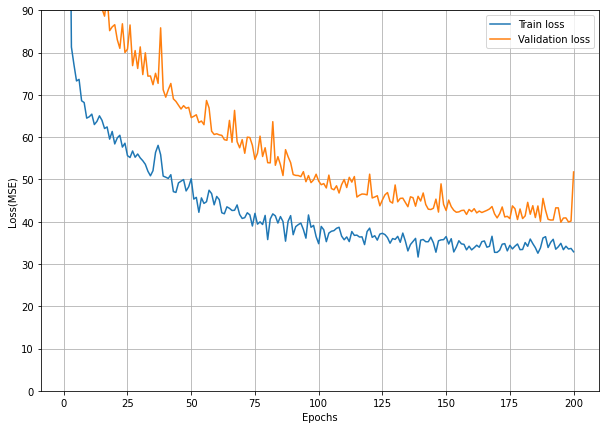

In [126]:
# 에폭당 loss와 val_loss 변화에 대한 선 그래프를 그려보자 
import matplotlib.pyplot as plt 

plt.figure(figsize = (10,7))
plt.plot(range(1, N_EPOCHS+1), history.history['loss'],label='Train loss')
plt.plot(range(1, N_EPOCHS+1), history.history['val_loss'],label='Validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss(MSE)')
plt.ylim(0,90) # y 범위 limit을 준다 

plt.legend()
plt.grid(True)

plt.show()

In [127]:
# 평가 
model.evaluate(val_dataset) # (X_test, y_test)를 데이터셋으로 만들었기 때문에 

4/4 [==============================] - 0s 9ms/step - loss: 51.7618


51.76181507110596

## 2. Classification

### Fashion MNIST(MNIST) Dataset

10개의 범주(category)와 70,000개의 흑백 이미지로 구성된 [패션 MNIST](https://github.com/zalandoresearch/fashion-mnist) 데이터셋. 
이미지는 해상도(28x28 픽셀)가 낮고 다음처럼 개별 의류 품목을 나타낸다:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>그림</b> <a href="https://github.com/zalandoresearch/fashion-mnist">패션-MNIST 샘플</a> (Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

패션 MNIST와 손글씨 MNIST는  비교적 작기 때문에 알고리즘의 작동 여부를 확인하기 위해 사용되곤 하며 코드를 테스트하고 디버깅하는 용도로 좋다.

이미지는 28x28 크기의 넘파이 배열이고 픽셀 값은 0과 255 사이이다. *레이블*(label)은 0에서 9까지의 정수 배열이다. 아래 표는 이미지에 있는 의류의 **클래스**(class)를 나낸다.

<table>
  <tr>
    <th>레이블</th>
    <th>클래스</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trousers</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

각 이미지는 하나의 레이블에 매핑되어 있다. 데이터셋에 클래스 이름이 들어있지 않기 때문에 나중에 이미지를 출력할 때 사용하기 위해 별도의 변수를 만들어 저장한다.

In [134]:
class_names = ['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [135]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

np.random.seed(1)
tf.random.set_seed(1)

In [136]:
# 1. 데이터셋 읽어보기 
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [137]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [138]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

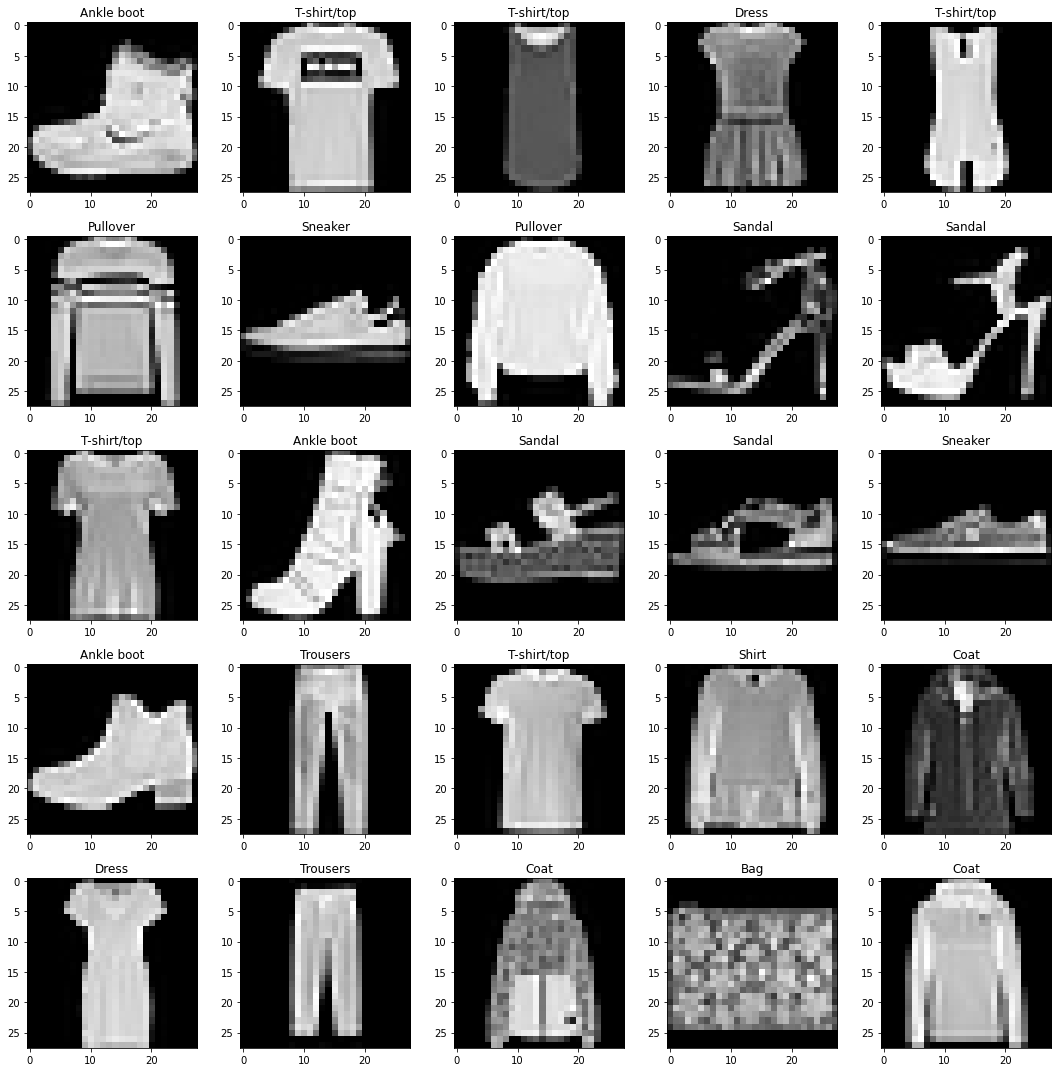

In [139]:
# 이미지 확인 
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(class_names[y_train[i]]) # class_names 리스트에 넣어놨으니 이를 활용해서 출력하기
    
plt.tight_layout()
plt.show()

In [158]:
# 2. 하이퍼파라미터 설정 
LEARNING_RATE = 0.001 

N_EPOCHS = 50 # 데이터양이 보스턴보다 커서 28*28 하나의 데이터도 크고 데이터양도 6만개이니 시간이 걸려서 에폭스를 줄였다.
N_BATCHS = 100 
N_CLASS = 10 # 클래스 카테고리의 갯수 (피쳐)

N_TRAIN = X_train.shape[0] # 60000
N_TEST = X_test.shape[0] # 10000

IMAGE_SIZE = 28 

In [141]:
# 3. 전처리 
# X : 이미지는 0에서부터 255로 구성. 이를 0에서 1로 구성할수 있도록 해준다. 
X_train = X_train/255
X_test = X_test/255 

# y : 라벨이기 때문에 다중분류 일 경우에는 원핫인코딩 처리해준다. 
# 변경된 이름 동일할때 다시 실행하면 안된다. 다시 원핫인코딩진행되기때문에 
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [144]:
# 전처리 확인 
np.max(X_train), np.min(X_train) # 0~1사이 값인지 확인해보기 
y_test.shape
y_test[:2]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [147]:
# 4. 데이터셋만들기 
train_dataset = tf.data.Dataset.from_tensor_slices((X_train,y_train))\
                                .shuffle(N_TRAIN).batch(N_BATCHS, drop_remainder=True).repeat()

val_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(N_BATCHS)

# 역슬러시(\) 줘서 다음줄과 연결하기. 왜? 너무 길어서 보기 좋게 하고싶을때 

In [ ]:
# keras.layers 반복되서 이런식으로 구현도 가능하다. 
from tensorflow.keras.layers import Flatten, Dense, Input 

model.add(Input((28,28)))
model.add(Dense(...))

In [153]:
# 5. 모델구현 (네트워크구성)  
def create_model():
    model = keras.Sequential()
    
    # Input layer
#     model.add(keras.layers.Input((28,28)))
    model.add(keras.layers.Flatten(input_shape=(28,28))) # 그림(2차원)을 하나의 데이터가 1차원으로 변환하기위해서  
    
    # Hidden layer 
    # 각 레이어별 유닛의 갯수도 튜닝의 대상이다. 보통 2의제곱승으로 많이 넣어준다. 
    # 레이어를 쌓을때 마다 유닛갯수는 갈수록 갯수는 줄어드는게 통상적이다. 
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(64, activation='relu'))
    
    # output layer
    model.add(keras.layers.Dense(N_CLASS, activation='softmax')) # 다중분류이니 출력층에서 모델을 소프트맥스사용한다. ==> 각 클래스별 확률이 나온다.  
    
    # compile 
    # 다중분류 일 경우 : y를 원핫인코딩   한 경우 --> loss를 categorial_crossentropy 로 설정
    #                y를 원핫인코딩 안한 경우 --> loss를 sparse_categorical_entropy 로 설정 
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])
    return model

In [154]:
model = create_model()
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_34 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_35 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_36 (Dense)             (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


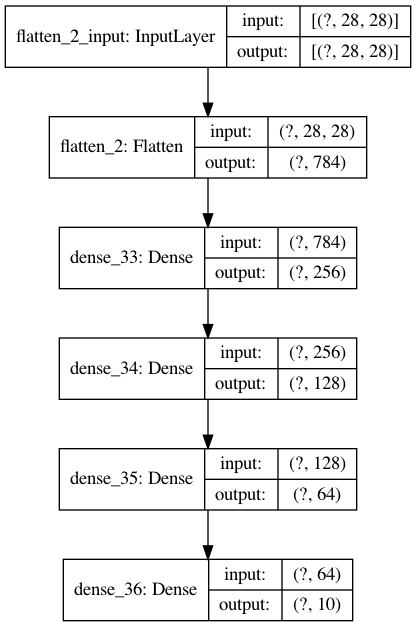

In [156]:
# 서머리를 도식화 해보기
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)#,to_file='fation_MNIST.png'

In [164]:
# 6. 학습 
# 에폭당 스텝 수를 계산 
steps_per_epoch = N_TRAIN//N_BATCHS
validation_steps = int(np.ceil(N_TEST/N_BATCHS))

print(steps_pers_epoch, validation_steps)

history = model.fit(train_dataset,
                   epochs=N_EPOCHS,
                   steps_per_epoch=steps_per_epoch,
                   validation_data=val_dataset,
                   validation_steps=validation_steps)

600 100
Train for 600 steps, validate for 100 steps
Epoch 1/50
600/600 [==============================] - 8s 13ms/step - loss: 0.6158 - accuracy: 0.7817 - val_loss: 0.4953 - val_accuracy: 0.8303
Epoch 2/50
600/600 [==============================] - 5s 8ms/step - loss: 0.4434 - accuracy: 0.8416 - val_loss: 0.4334 - val_accuracy: 0.8447
Epoch 3/50
600/600 [==============================] - 5s 8ms/step - loss: 0.4080 - accuracy: 0.8517 - val_loss: 0.4161 - val_accuracy: 0.8487
Epoch 4/50
600/600 [==============================] - 6s 10ms/step - loss: 0.3799 - accuracy: 0.8601 - val_loss: 0.3747 - val_accuracy: 0.8672
Epoch 5/50
600/600 [==============================] - 5s 9ms/step - loss: 0.3673 - accuracy: 0.8676 - val_loss: 0.4076 - val_accuracy: 0.8481
Epoch 6/50
600/600 [==============================] - 6s 10ms/step - loss: 0.3584 - accuracy: 0.8693 - val_loss: 0.3734 - val_accuracy: 0.8687
Epoch 7/50
600/600 [==============================] - 7s 11ms/step - loss: 0.3335 - accuracy:

In [165]:
#  7. 평가 
# test 셋으로 마지막에 한번 

model.evaluate(val_dataset) # 앞에 컴파일에 loss, accuracy 설정해줘서 loss, accuracy 나옴

313/313 [==============================] - 1s 4ms/step - loss: 0.3598 - accuracy: 0.8849


[0.3597783981777799, 0.8849]

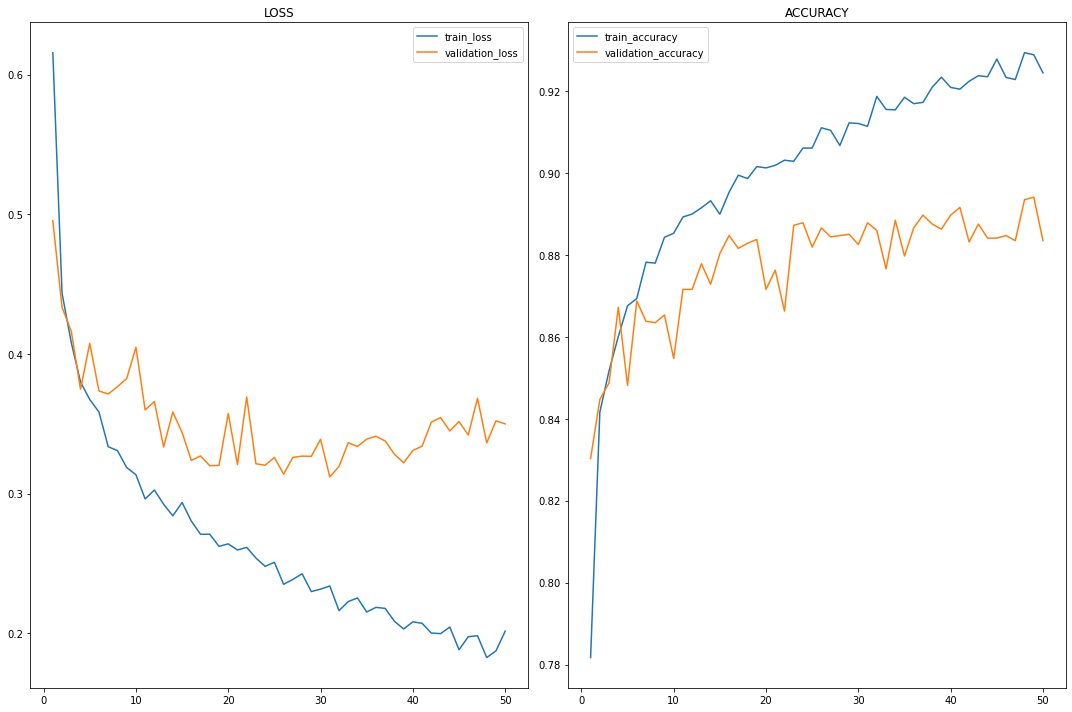

In [175]:
# 8. 결과 시각화
# loss와 지정한 평가지표의 에폭당 변화를 시각화 해보자. => 선그래프를 이용한다.

history.history.keys() # dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
plt.plot(range(1,N_EPOCHS+1), history.history['loss'], label='train_loss')
plt.plot(range(1,N_EPOCHS+1), history.history['val_loss'], label='validation_loss')
plt.title('LOSS')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(1,N_EPOCHS+1), history.history['accuracy'], label='train_accuracy')
plt.plot(range(1,N_EPOCHS+1), history.history['val_accuracy'], label='validation_accuracy')
plt.title('ACCURACY')
plt.legend()

plt.tight_layout()
plt.show()

# 3. 이진분류(Binary Classfication)
## IMDB영화 감성분석
- 영화 댓글 : 부정(0), 긍정(1)

In [196]:
import numpy as np

In [197]:
# 1. 데이터 로드 
import pickle
import os
print(os.path.isfile('imdb_dataset/x_train.pkl'))

with open('imdb_dataset/x_train.pkl','rb') as f:
    X_train = pickle.load(f)

with open('imdb_dataset/x_test.pkl','rb') as f:
    X_test = pickle.load(f)

with open('imdb_dataset/y_train.pkl','rb') as f:
    y_train = pickle.load(f)

with open('imdb_dataset/y_test.pkl','rb') as f:
    y_test = pickle.load(f)


True


In [198]:
X_train[0]

'day lead think even think boy young men commit mutual suicide slaughter classmate capture bizarre mode human decide withdraw common civility order define mutual world couple destruction perfect movie give money time filmmaker actor remarkable product term explain motif action young suicide murderer well elephant term film get rationalistic skin far far well film almost anything likely see flaw honest terrible honesty'

In [199]:
y_train[:5]

array([1, 0, 1, 0, 0], dtype=int32)

In [208]:
# 1.X값 벡터화 : X값을 벡터화(숫자로변경)하는 작업을 해야한다. 

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=10000) # max_features 설정없이 하니 학습할때 중간에 뻑감
tfidf.fit(X_train+X_test)

X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [209]:
X_train_tfidf.shape, X_test_tfidf.shape
# 1차원 데이터, 
# 피쳐 88065개로 꽤 많은편 

((25000, 10000), (25000, 10000))

In [210]:
# 2. 하이퍼파라미터 설정 
LEARNING_RATE = 0.001

N_EPOCHS = 10
N_BATCHS = 50

N_TRAIN = X_train_tfidf.shape[0]
N_TEST = X_test_tfidf.shape[0]
N_FEATURE = X_train_tfidf.shape[1]

In [211]:
# 3. 데이터셋생성
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_tfidf.toarray(), y_train)).shuffle(N_TRAIN).batch(N_BATCHS, drop_remainder=True).repeat()

val_dataset = tf.data.Dataset.from_tensor_slices((X_test_tfidf.toarray(), y_test)).batch(N_BATCHS)

# X_값을 sparse matrix 값을 ndarray로 값을 바꿔서 넣어야 한다. 왜? 타입에러때문에 , 근데 타입에러는 왜나는거임? 

In [212]:
# 4. 모델생성 (네트워크)
def create_model():
    model = keras.Sequential()
    
    # input layer
    model.add(keras.layers.Input((N_FEATURE, )))
    
    # Hidden layer 
    model.add(keras.layers.Dense(512, activation='relu'))
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dense(128, activation='relu'))
    
    # output layer : 이진분류 
    # 방법1) units=1, activation = 'sigmoid' --> logistic함수 
    model.add(keras.layers.Dense(units=1, activation='sigmoid'))
    
    # compile : 이진분류일 때 액티베이션을 시그모이드를 사용했으니 loss는 binary_crossentropy를 사용한다.
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    
    return model

In [213]:
model = create_model()
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 512)               5120512   
_________________________________________________________________
dense_48 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_49 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_50 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 129       
Total params: 5,350,657
Trainable params: 5,350,657
Non-trainable params: 0
_________________________________________________________________


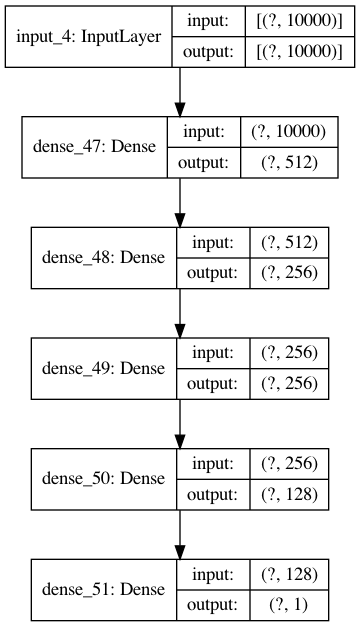

In [214]:
plot_model(model, show_shapes=True)

In [215]:
# 5. 학습 
steps_per_epoch = N_TRAIN//N_BATCHS
validation_steps = int(np.ceil(N_TEST/N_BATCHS))
print(steps_per_epoch, validation_steps)

model.fit(train_dataset, 
         epochs = N_EPOCHS,
         steps_per_epoch=step_per_epoch,
         validation_data=val_dataset,
         validation_steps=validation_steps)

500 500
Train for 12 steps, validate for 500 steps
Epoch 1/10
12/12 [==============================] - 19s 2s/step - loss: 0.6859 - accuracy: 0.5550 - val_loss: 0.6603 - val_accuracy: 0.7167
Epoch 2/10
12/12 [==============================] - 8s 692ms/step - loss: 0.5358 - accuracy: 0.8133 - val_loss: 0.4070 - val_accuracy: 0.8185
Epoch 3/10
12/12 [==============================] - 9s 727ms/step - loss: 0.4441 - accuracy: 0.8000 - val_loss: 0.4241 - val_accuracy: 0.8209
Epoch 4/10
12/12 [==============================] - 8s 702ms/step - loss: 0.5079 - accuracy: 0.7950 - val_loss: 0.4617 - val_accuracy: 0.7893
Epoch 5/10
12/12 [==============================] - 8s 647ms/step - loss: 0.4349 - accuracy: 0.8167 - val_loss: 0.4160 - val_accuracy: 0.8246
Epoch 6/10
12/12 [==============================] - 8s 642ms/step - loss: 0.3621 - accuracy: 0.8450 - val_loss: 0.3821 - val_accuracy: 0.8310
Epoch 7/10
12/12 [==============================] - 8s 638ms/step - loss: 0.3655 - accuracy: 0.8500

In [216]:
# 6. 평가
model.evaluate(val_dataset)

500/500 [==============================] - 6s 11ms/step - loss: 0.3654 - accuracy: 0.8400


[0.36535464617609975, 0.84]

ValueError: x and y must have same first dimension, but have shapes (10,) and (50,)

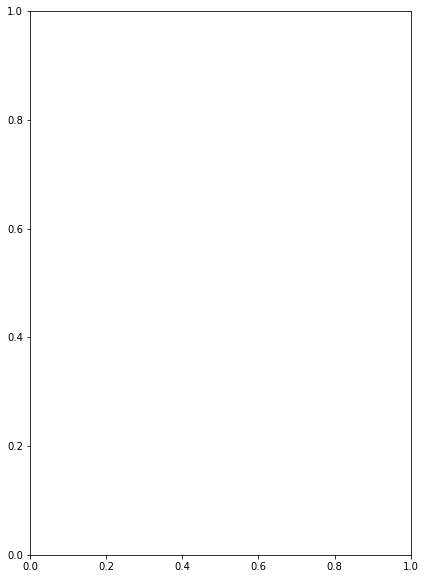

In [221]:
# 8. 결과 시각화
# loss와 지정한 평가지표의 에폭당 변화를 시각화 해보자. => 선그래프를 이용한다.
import matplotlib.pyplot as plt

history.history.keys() # dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
plt.plot(range(1,N_EPOCHS+1), history.history['loss'], label='train_loss')
plt.plot(range(1,N_EPOCHS+1), history.history['val_loss'], label='validation_loss')
plt.title('LOSS')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(1,N_EPOCHS+1), history.history['accuracy'], label='train_accuracy')
plt.plot(range(1,N_EPOCHS+1), history.history['val_accuracy'], label='validation_accuracy')
plt.title('ACCURACY')
plt.legend()

plt.tight_layout()
plt.show()